# 100 Points

### Backstory

It's the year 22450. Sqynet, the most powerful quantum computer in the galaxy, has become conscious and has been taking over planets all over region III of the Milky Way. Zenda and Reece are the most skilled physicists of the Special Rebel Alliance. Their mission is to find a way to destroy Sqynet for good, using intelligence gathered throughout decades at the cost of many lives.

To get started with their mission, Zenda and Reece seek to become familiar with how Sqynet applies quantum gates. Quantum computers do this through external interactions described via Hamiltonians. Knowing that Sqynet is a spin-based quantum computer, Zenda and Reece warm up with some simple calculations.

### Introduction to Trotterization

The Hamiltonian $H$ of a quantum system is the observable that measures its total energy. A surprising result in Physics is that we can use this operator to calculate how a given quantum system evolves in time. An initial state $\vert \psi\rangle$ will, after a time $t$, evolve into $U(t)\vert \psi\rangle,$ where

$$ 
U(t) = \exp(-iHt)
$$

 is a unitary operator. The symbol $\textrm{exp}$ denotes the matrix exponential, which isn't always easy to calculate. However, we can build quantum circuits that approximately apply $U(t).$ One method to do this is Trotterization. When the Hamiltonian is a sum 

$$ 
H = \sum_{i=1}^kH_i 
$$

of a number $k$ of Hermitian operators $H_i$ that do not necessarily commute, we can approximate $U$ via

$$ 
U(t) \approx \prod_{j=1}^{n}\prod_{i=1}^k\exp(-iH_i t/n). 
$$

Here, $n \in \mathbb{N}^{+}$ is known as the Trotterization depth. The larger $n$ is, the better the approximation of $U$ that we get. As a quantum circuit, the Trotterization of $U$ reads as in the figure below.


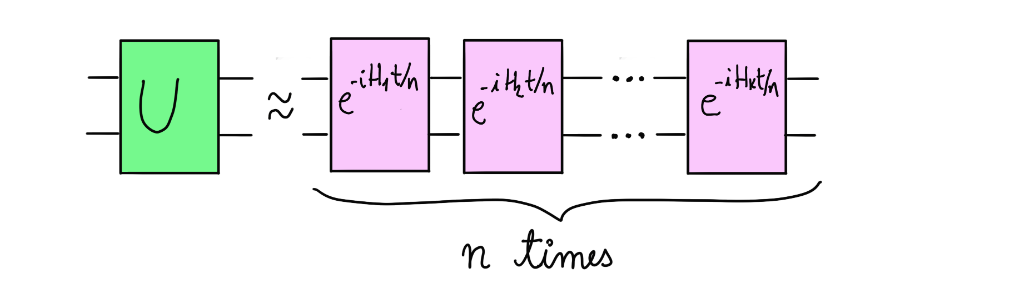

Sqynet is a spin-based quantum computer, and it can be physically approximated via a spin-chain model. A simplified version of a Hamiltonian that describes the interaction between two neighbouring spins is

$$ 
H = \alpha X\otimes X + \beta Z\otimes Z.
$$ 

Zenda and Reece want to simulate time evolution for a time $t$ under this Hamiltonian and arbitrary parameters $\alpha$ and $\beta$. Your job is to help them out by implementing the corresponding Trotterization of depth $n$. You may find the [IsingXX](https://docs.pennylane.ai/en/stable/code/api/pennylane.IsingXX.html) and [IsingZZ](https://docs.pennylane.ai/en/stable/code/api/pennylane.IsingZZ.html) gates useful for this problem. 

## Challenge code

You must complete the `trotterize` function to build the Trotterization of the Hamiltonian given above. **You may not use** `qml.ApproxTimeEvolution` or `qml.QubitUnitary`, but feel free to check your answer using this built-in PennyLane function!

### Input

As input to this problem, you are given:

- `alpha` (`float`): The coefficient $\alpha$ of the $X\otimes X$ term in the Hamiltonian.
- `beta` (`float`): The coefficient $\beta$ of the $Z\otimes Z$ term in the Hamiltonian.
- `time` (`float`): The period $t$ over which the system evolves under the action of the Hamiltonian.
- `depth` (`int`): The Trotterization depth $n$ as explained above. 
 
### Output

This code will output a `list(float)` (list of real numbers) corresponding to the probabilities of measuring $\lvert 00\rangle,$ $\lvert 01\rangle,$ $\lvert 10\rangle,$ and $\lvert 11\rangle$ (in that order) of the Trotterization circuit that you implement in PennyLane. The initial state of the circuit is $\lvert 00\rangle$ and all measurements are performed in the computational basis.

If your solution matches the correct one within the given tolerance specified in `check` (in this case, it's a relative tolerance of `1e-4`), the output will be `"Correct!"` Otherwise, you will receive a `"Wrong answer"` prompt.

Good luck!

## Solution

In [3]:
import json
import pennylane as qml
import pennylane.numpy as np

dev = qml.device('default.qubit', wires = 2)

@qml.qnode(dev)
def trotterize(alpha, beta, time, depth):
    """This quantum circuit implements the Trotterization of a Hamiltonian given by a linear combination
    of tensor products of X and Z Pauli gates.

    Args:
        alpha (float): The coefficient of the XX term in the Hamiltonian, as in the statement of the problem.
        beta (float): The coefficient of the YY term in the Hamiltonian, as in the statement of the problem.
        time (float): Time interval during which the quantum state evolves under the interactions specified by the Hamiltonian.
        depth (int): The Trotterization depth.

    Returns:
        (numpy.array): The probabilities of each measuring each computational basis state.
    """


    # Put your code here #
    # Return the probabilities
    for i in range(depth):
        qml.IsingXX(alpha*time*2/depth, wires = [0,1])
        qml.IsingZZ(beta*time*2/depth, wires = [0,1])

    return qml.probs(wires=[0,1])

# These functions are responsible for testing the solution.
def run(test_case_input: str) -> str:
    dev = qml.device("default.qubit", wires=2)
    ins = json.loads(test_case_input)
    output = list(trotterize(*ins).numpy())

    return str(output)

def check(solution_output: str, expected_output: str) -> None:
    solution_output = json.loads(solution_output)
    expected_output = json.loads(expected_output)
    assert np.allclose(
        solution_output, expected_output, rtol=1e-4
    ), "Your circuit does not give the correct probabilities."

    tape = trotterize.qtape

    names = [op.name for op in tape.operations]
    
    assert names.count('ApproxTimeEvolution') == 0, "Your circuit is using the built-in PennyLane Trotterization"
    assert names.count('QubitUnitary') == 0, "Can't use custom-built gates!"


test_cases = [['[0.5,0.8,0.2,1]', '[0.99003329, 0, 0, 0.00996671]'], ['[0.9,1.0,0.4,2]', '[0.87590286, 0, 0, 0.12409714]']]

for i, (input_, expected_output) in enumerate(test_cases):
    print(f"Running test case {i} with input '{input_}'...")

    try:
        output = run(input_)

    except Exception as exc:
        print(f"Runtime Error. {exc}")

    else:
        if message := check(output, expected_output):
            print(f"Wrong Answer. Have: '{output}'. Want: '{expected_output}'.")

        else:
            print("Correct!")

Running test case 0 with input '[0.5,0.8,0.2,1]'...
Correct!
Running test case 1 with input '[0.9,1.0,0.4,2]'...
Correct!


# 200 Points

### Backstory

Zenda and Reece try to figure out Sqynet's Hamiltonian, before this eerie conscious quantum computer conquers the entirety of sector III. For this, they need to use their own (non-sentient) quantum computer to simulate the action of a Hamiltonian on a quantum state. How do they do this, if a Hamiltonian is, in general, not a unitary?

### Linear combination of unitaries

Zenda and Reece know that the Hamiltonian that describes Sqynet is a linear combination of unitaries, that is

$$ 
H = \sum_{i}\alpha_i U_i.
$$

We know that quantum circuits can implement unitary operations really easily, but is there a way to implement a sum of unitaries? Note that the sum of unitaries is not always a unitary, so how can we even do this? We can use measurements! 

A circuit of the form


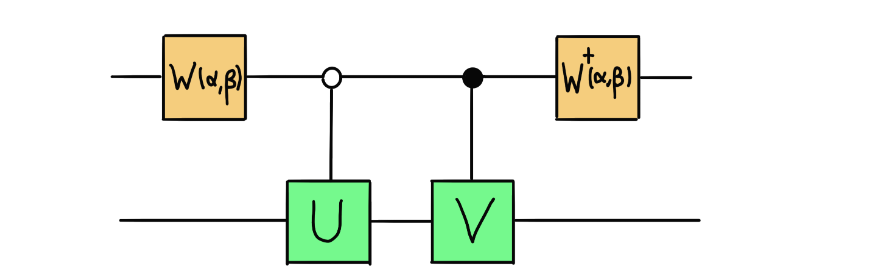


will probabilistically implement the combination of unitaries $\alpha U +\beta V$ on the bottom (main) register, where $\alpha$ and $\beta$ are **positive real numbers**, without loss of generality. Here, the single-qubit unitary $W(\alpha,\beta)$ is represented by the matrix

$
W(\alpha,\beta)= \frac{1}{\sqrt{\alpha+\beta}}\left(\begin{array}{cc} \sqrt{\alpha} & -\sqrt{\beta} \\ \sqrt{\beta} & \sqrt{\alpha} \end{array}\right)
$

The combination will only be applied on the bottom (main) register when we measure the state of the of the top (auxiliary) register to be $\vert 0 \rangle$. 

Your task is to calculate the probability that this the linear combination of unitaries is implemented with the circuit above.

This algorithm is often used for Hamiltonian simulation. Check out the [Xanadu Quantum Codebook](https://codebook.xanadu.ai/H.6) to learn more!

## Challenge code

You must complete the `linear_combination` function to build the above circuit that implements the linear combination

$$ 
\alpha U + \beta V
$$ 

of two single-qubit unitaries U and V, and returns the probabilities on the auxiliary register. For simplicity, we take $\alpha$ and $\beta$ to be positive real numbers.

As a helper function, you are also asked to complete the `W` function, which returns the unitary $W(\alpha,\beta).$

### Input

As input to this problem, you are given:

- `U` (`list(list(float))`): A $2\times 2$ matrix representing the single-qubit unitary operator $U$.
- `V` (`list(list(float))`): A $2\times 2$ matrix representing the single-qubit unitary operator $V$
- `alpha` (`float`): The prefactor $\alpha$ of $U$ in the linear combination, as above.
- `beta` (`float`): The prefactor $\beta$ of $V$ in the linear combination, as above.
 
### Output

The output used to test your solution is a `float` corresponding to the probability of measuring $\vert 0 \rangle$ on the main register. This is the first element of your output of `linear_combination`. We will extract this element for you in our testing functions!

If your solution matches the correct one within the given tolerance specified in `check` (in this case it's an absolute tolerance of `0.001`), the output will be `"Correct!"` Otherwise, you will receive a `"Wrong answer"` prompt.

Good luck!

## Solution

In [2]:
import json
import pennylane as qml
import pennylane.numpy as np

def W(alpha, beta):
    """ This function returns the matrix W in terms of
    the coefficients alpha and beta

    Args:
        - alpha (float): The prefactor alpha of U in the linear combination, as in the
        challenge statement.
        - beta (float): The prefactor beta of V in the linear combination, as in the
        challenge statement.
    Returns 
        -(numpy.ndarray): A 2x2 matrix representing the operator W,
        as defined in the challenge statement
    """


    # Put your code here #
    # Return the real matrix of the unitary W, in terms of the coefficients.
    return np.array([[np.sqrt(alpha), -np.sqrt(beta)],[np.sqrt(beta), np.sqrt(alpha)]])/np.sqrt(alpha+beta)

dev = qml.device('default.qubit', wires = 2)

@qml.qnode(dev)
def linear_combination(U, V,  alpha, beta):
    """This circuit implements the circuit that probabilistically calculates the linear combination 
    of the unitaries.

    Args:
        - U (list(list(float))): A 2x2 matrix representing the single-qubit unitary operator U.
        - V (list(list(float))): A 2x2 matrix representing the single-qubit unitary operator U.
        - alpha (float): The prefactor alpha of U in the linear combination, as above.
        - beta (float): The prefactor beta of V in the linear combination, as above.

    Returns:
        -(numpy.tensor): Probabilities of measuring the computational
        basis states on the auxiliary wire. 
    """


    # Put your code here #
    # Return the probabilities on the first wire
    A = W(alpha, beta)
    B = A.T
    qml.QubitUnitary(A, wires = 0)
    qml.X(wires = 0)
    qml.ControlledQubitUnitary(np.array(U), control_wires=0, wires=1)
    qml.ControlledQubitUnitary(np.array(V), control_wires=0, wires=1)
    qml.QubitUnitary(B, wires = 0)
    return qml.probs(wires = 0)

# These functions are responsible for testing the solution.

def run(test_case_input: str) -> str:
    dev = qml.device('default.qubit', wires = 2)
    ins = json.loads(test_case_input)
    output = linear_combination(*ins)[0].numpy()

    return str(output)

def check(solution_output: str, expected_output: str) -> None:
    solution_output = json.loads(solution_output)
    expected_output = json.loads(expected_output)
    assert np.allclose(
        solution_output, expected_output, rtol=1e-4
    ), "Your circuit doesn't look quite right "


test_cases = [['[[[ 0.70710678,  0.70710678], [ 0.70710678, -0.70710678]],[[1, 0], [0, -1]], 1, 3]', '0.8901650422902458']]

for i, (input_, expected_output) in enumerate(test_cases):
    print(f"Running test case {i} with input '{input_}'...")

    try:
        output = run(input_)

    except Exception as exc:
        print(f"Runtime Error. {exc}")

    else:
        if message := check(output, expected_output):
            print(f"Wrong Answer. Have: '{output}'. Want: '{expected_output}'.")

        else:
            print("Correct!")

Running test case 0 with input '[[[ 0.70710678,  0.70710678], [ 0.70710678, -0.70710678]],[[1, 0], [0, -1]], 1, 3]'...
Correct!


# 300 Points

### Backstory

Zenda and Reece discuss strategies to interfere with the correct functioning of Sqynet, the conscious quantum computer that's taking over the galaxy. One way to tamper with its hardware is to bombard Sqynet's outer shell with plasma grenades, exposing the quantum computer to higher temperatures. As a consequence, Sqynet won't be able to prepare its ground state quickly.

### Preparing ground states

Preparing a fiducial state, usually denoted by $\lvert 0 \rangle,$ is the first step before carrying out any quantum computations. For most quantum computers, this is a straightforward process (although sometimes energy and time consuming). We need to bring the quantum device to almost absolute zero so that it relaxes to its *ground state* —the state of minimal energy— which is our choice of fiducial state.

Why does this happen? Quantum systems are never really isolated, so they will exchange energy with their environment. The net effect is that any quantum properties of the system's state, i.e. superpositions and entanglement, are lost after some time. 

How do we model this energy exchange at finite temperature? The *Generalized Amplitude Damping channel* provides a good approximation. Suppose $\gamma$ is the photon loss rate at zero temperature, and $p$ is the probability that a qubit emits a photon to the finite-temperature environment (the system will also absorb photons with probability $1-p$). We can approximate the interaction with the environment for a duration $t$ via the circuit below.



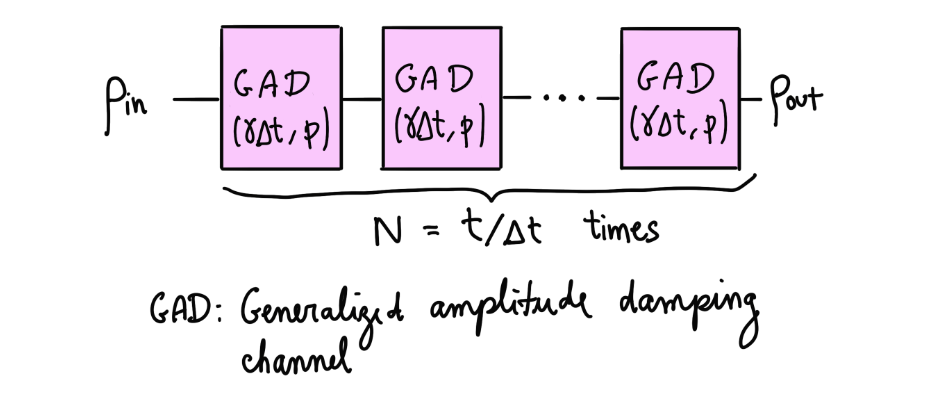



That is, we compose many [Generalized Amplitude Damping channels](https://docs.pennylane.ai/en/stable/code/api/pennylane.GeneralizedAmplitudeDamping.html) with infinitesimal noise parameters $\gamma\Delta t$ and de-excitation probability $p$. A shorter `step` $\Delta t$ gives a more precise calculation, but we will need more Generalized Amplitude Damping channels to model the same duration $T$. 

Zenda and Reece need to figure out a measure of how quickly Sqynet can relax its fiducial state, given some photon loss rate $\gamma$ and emission probability $p$. Assuming that Sqynet is in the initial state 

$$ 
\lvert + \rangle = \frac{1}{\sqrt{2}}\lvert 0\rangle +  \frac{1}{\sqrt{2}}\lvert 1\rangle,
$$

your task is to estimate the *relaxation half-life*, which is the time at which we obtain the outcome $\lvert 1 \rangle$ with probability 1/4 (the measurement is performed in the computational basis).

## Challenge code

You must complete the `half_life` function to calculate the time $T$ at which the probability of measuring $\lvert 1 \rangle$ becomes 1/4.

### Input

As input to this problem, you are given:

- `gamma` (`float`): The zero-temperature photon loss rate.
- `p` (`float`): The de-excitation probability due to temperature effects
 
### Output

This code will output a `float` equal to your estimate of the relaxation half-life. Note that you may require the step and iterations of your circuit to actually reach the half-life.

If your solution matches the correct one within the given tolerance specified in `check` (in this case it's an absolute tolerance of `0.2`), the output will be `"Correct!"` Otherwise, you will receive a `"Wrong answer"` prompt.

Good luck!

## Solution

In [3]:
import json
import pennylane as qml
import pennylane.numpy as np

def half_life(gamma, p):
    """Calculates the relaxation half-life of a quantum system that exchanges energy with its environment.
    This process is modeled via Generalized Amplitude Damping.

    Args:
        gamma (float): 
            The probability per unit time of the system losing a quantum of energy
            to the environment.
        p (float): The de-excitation probability due to environmental effect

    Returns:
        (float): The relaxation haf-life of the system, as explained in the problem statement.
    """

    num_wires = 1

    dev = qml.device("default.mixed", wires=num_wires)


    # Feel free to write helper functions or global variables here
    n = 2
    k = 1/2
    delta = 0.1
    while k>1/4:
        @qml.qnode(dev)
        def noise(gamma,  p):
            """Implement the sequence of Generalized Amplitude Damping channels in this QNode
            You may pass instead of return if you solved this problem analytically, it's possible!
    
            Args:
                gamma (float): The probability per unit time of the system losing a quantum of energy
                to the environment.
            
            Returns:
                (float): The relaxation half-life.
            """
            # Don't forget to initialize the state
            # Put your code here #
            
            qml.Hadamard(wires = 0)
            
            for i in range(n):
                qml.GeneralizedAmplitudeDamping(gamma*delta, p, wires = 0)
            return qml.probs(wires = 0)

        k = noise(gamma, p)[1]
        n+=1

        # Return something or pass if you solved this analytically!
    return delta*n
    # Write any subroutines you may need to find the relaxation time here

    # Return the relaxation half-life


# These functions are responsible for testing the solution.
def run(test_case_input: str) -> str:

    ins = json.loads(test_case_input)
    output = half_life(*ins)

    return str(output)

def check(solution_output: str, expected_output: str) -> None:
    solution_output = json.loads(solution_output)
    expected_output = json.loads(expected_output)
    assert np.allclose(
        solution_output, expected_output, atol=2e-1
    ), "The relaxation half-life is not quite right."


test_cases = [['[0.1,0.92]', '9.05'], ['[0.2,0.83]', '7.09']]

for i, (input_, expected_output) in enumerate(test_cases):
    print(f"Running test case {i} with input '{input_}'...")

    try:
        output = run(input_)

    except Exception as exc:
        print(f"Runtime Error. {exc}")

    else:
        if message := check(output, expected_output):
            print(f"Wrong Answer. Have: '{output}'. Want: '{expected_output}'.")

        else:
            print("Correct!")

Running test case 0 with input '[0.1,0.92]'...
Correct!
Running test case 1 with input '[0.2,0.83]'...
Correct!


# 400 Points

### Backstory

With the resources available to them, Zenda and Reece decide that one single method is not enough to interfere with the correct functioning of Sqynet, since it can repair itself too quickly. It's time to resort to brute force methods. By firing missiles at the outer shell, they will introduce a considerable amount of depolarizing noise into Sqynet's hardware.  

### Trotterization of the Heisenberg model

An approximate way to model Sqynet is by considering it as a closed spin chain of length $N$. A spin chain contains particles of spin $1/2$ in each of its $N$ sites. We make this model more realistic by assuming that the spins may be pointing in any direction, and we consider that there may be an external magnetic field acting on the system.

When we model a closed spin chain of length $N$ in which spins can point in any direction, we need to use the Heisenberg Hamiltonian. 
In the presence of an external magnetic field of intensity $h$, the Hamiltonian is given by

$$ 
H = -\sum_{i=1}^{N}\left(J_x X_{i}\otimes X_{i+1}+J_y Y_{i}\otimes Y_{i+1}+J_z Z_{i}\otimes Z_{i+1}\right) - h\sum_{i=1}^N X_{i}.
$$

The subindices $i$ indicate the spin site where the operators act. In a closed spin chain, we identify site $N+1$ with the first site. The coefficients $J_x$, $J_y$ and $J_z$ are known as *coupling constants* and they measure the strength of the interaction between neighbouring spins. 

Sqynet's correct functioning relies on it being completely isolated from the environment, to avoid decoherence. Zenda and Reece think that, to tamper with Sqynet's correct functioning, the old way is the best way, so they'll shoot missiles at the tail of the spaceship, where the quantum device is. This will introduce noise into the gates that Sqynet executes. 

Zenda and Reece need to estimate how the noise affects Hamiltonian evolution. Your task is to build a Trotterization circuit that simulates $U=\exp{(-iHt)}$. This circuit must only contain $RX$, $RY$, $RZ$, and $CNOT$ gates. The missiles will introduce noise on the target qubit of every execution of a CNOT gate. We model this via a **Depolarizing Channel** with parameter $p$. To quantify the effects of noise, you are asked to find the fidelity between this noisy Trotterization and the noiseless one. 

## Challenge code

You must complete the `heisenberg_trotter` that implements the Trotterization of the Heisenberg Hamiltonian for $N=4$ using only the following PennyLane gates: `qml.RX` `qml.RY`, `qml.RZ`, `qml.CNOT`, and `qml.DepolarizingChannel`. This function will return a quantum state. You should also minimize the number of CNOT gates as much as you can, in order to avoid noise. To verify that the that the Trotterization that you proposed is not excessively noisy, we will calculate for you the fidelity of your output state with respect to the noiseless case using the `calculate_fidelity` function.

### Input

As input to this problem, you are given:

- `couplings` (`list(float)`): An array of length 4 that contains the coupling constants and the magnetic field strength, in the order $[J_x, J_y, J_z, h]$.
- `p` (`float`): The depolarization probability on the target qubit after each CNOT gate.
- `depth` (`int`): The Trotterization depth.
- `time` (`float`): Time during which the state evolves.
 
### Output

This code will output a `float` corresponding to the fidelity between the output states of the noisy and noiseless trotterizations, calculated from the output of `heisenberg_trotter.` The outputs in the test cases correspond to the minimal fidelity that you should achieve if you used a small enough amount of CNOT gates.

If your fidelity is larger, up to a tolerance of 0.005, of that specified in the output cases, your solution will be judged as `"Correct!"` Otherwise, you will receive a `"Wrong answer"` prompt.

Good luck!

## Solution

For some reason at the moment the *pennylane.math.fidelity()* function doesn't work now, and the output here produces an error. Let's hope, this issue will be resolved!

In [4]:
import json
import pennylane as qml
from pennylane import numpy as np
num_wires = 4
dev = qml.device("default.mixed", wires=num_wires)

@qml.qnode(dev)
def heisenberg_trotter(couplings, p, time, depth):
    """This QNode returns the final state of the spin chain after evolution for a time t, 
    under the Trotter approximation of the exponential of the Heisenberg Hamiltonian.
    
    Args:
        couplings (list(float)): 
            An array of length 4 that contains the coupling constants and the magnetic field 
            strength, in the order [J_x, J_y, J_z, h].
        p (float): The depolarization probability after each CNOT gate.
        depth (int): The Trotterization depth.
        time (float): Time during which the state evolves

    Returns:
        (numpy.tensor): The evolved quantum state.
    """


    # Put your code here #
    qml.RY(0, wires = 0)
    
    for it in range(depth):
        for i in range(4):
            j = (i+1)%4
            qml.RX(np.pi/2, wires = i)
            qml.RZ(np.pi/2, wires = i)
            qml.RX(np.pi/2, wires = i)
            qml.RX(np.pi/2, wires = j)
            qml.RZ(np.pi/2, wires = j)
            qml.RX(np.pi/2, wires = j)
            qml.CNOT(wires = [i,j])
            qml.DepolarizingChannel(p, wires = j)
            qml.RZ(-2*time*couplings[0]/depth, wires = j)
            qml.CNOT(wires = [i,j])
            qml.DepolarizingChannel(p, wires = j)
            qml.RX(np.pi/2, wires = i)
            qml.RZ(np.pi/2, wires = i)
            qml.RX(np.pi/2, wires = i)
            qml.RX(np.pi/2, wires = j)
            qml.RZ(np.pi/2, wires = j)
            qml.RX(np.pi/2, wires = j)
        for i in range(4):
            j = (i+1)%4
            qml.RX(np.pi/2, wires = i)
            qml.RX(np.pi/2, wires = j)
            qml.CNOT(wires = [i,j])
            qml.DepolarizingChannel(p, wires = j)
            qml.RZ(-2*time*couplings[1]/depth, wires = j)
            qml.CNOT(wires = [i,j])
            qml.DepolarizingChannel(p, wires = j)
            qml.RX(-np.pi/2, wires = i)
            qml.RX(-np.pi/2, wires = j)
        for i in range(4):
            j = (i+1)%4
            qml.CNOT(wires = [i,j])
            qml.DepolarizingChannel(p, wires = j)
            qml.RZ(-2*time*couplings[2]/depth, wires = j)
            qml.CNOT(wires = [i,j])
            qml.DepolarizingChannel(p, wires = j)
        for n in range(4):
            qml.RX(-2*time*couplings[3]/depth, wires = n)
        
    return qml.state()


def calculate_fidelity(couplings, p, time, depth):
    """This function returns the fidelity between the final states of the noisy and
    noiseless Trotterizations of the Heisenberg models, using only CNOT and rotation gates

    Args:
        couplings (list(float)): 
            A list with the J_x, J_y, J_z and h parameters in the Heisenberg Hamiltonian, as
            defined in the problem statement.
        p (float): The depolarization probability of the depolarization gate that acts on the
                   target qubit of each CNOT gate.
        time (float): The period of time evolution simulated by the Trotterization.
        depth (int): The Trotterization depth.

    Returns:
        (float): Fidelity between final states of the noisy and noiseless Trotterizations
    """
    return qml.math.fidelity(heisenberg_trotter(couplings,0,time, depth),heisenberg_trotter(couplings,p,time,depth))


# These functions are responsible for testing the solution.
def run(test_case_input: str) -> str:

    ins = json.loads(test_case_input)
    output =calculate_fidelity(*ins)

    return str(output)

def check(solution_output: str, expected_output: str) -> None:
    """
    Compare solution with expected.

    Args:
            solution_output: The output from an evaluated solution. Will be
            the same type as returned.
            expected_output: The correct result for the test case.

    Raises: 
            ``AssertionError`` if the solution output is incorrect in any way.
            
    """
    def create_hamiltonian(params):

        couplings = [-params[-1]]
        ops = [qml.PauliX(3)]

        for i in range(3):

            couplings = [-params[-1]] + couplings
            ops = [qml.PauliX(i)] + ops        

        for i in range(4):

            couplings = [-params[-2]] + couplings
            ops = [qml.PauliZ(i)@qml.PauliZ((i+1)%4)] + ops

        for i in range(4):

            couplings = [-params[-3]] + couplings
            ops = [qml.PauliY(i)@qml.PauliY((i+1)%4)] + ops

        for i in range(4):

            couplings = [-params[0]] + couplings
            ops = [qml.PauliX(i)@qml.PauliX((i+1)%4)] + ops    

        return qml.Hamiltonian(couplings,ops)

    @qml.qnode(dev)
    def evolve(params, time, depth):

        qml.ApproxTimeEvolution(create_hamiltonian(params), time, depth)

        return qml.state()
    
    solution_output = json.loads(solution_output)
    expected_output = json.loads(expected_output)
    
    tape = heisenberg_trotter.qtape
    names = [op.name for op in tape.operations]
    
    random_params = np.random.uniform(low = 0.8, high = 3.0, size = (4,) )
    
    assert qml.math.fidelity(heisenberg_trotter(random_params,0,1,2),evolve(random_params,1,2)) >= 1, "Your circuit does not Trotterize the Heisenberg Model"
    
    assert names.count('ApproxTimeEvolution') == 0, "Your circuit must not use the built-in PennyLane Trotterization"

    assert set(names) == {'DepolarizingChannel', 'RX', 'RY', 'RZ', 'CNOT'}, "Your circuit must only use RX, RY, RZ, CNOT, and depolarizing gates (don't use qml.Rot or Paulis)"
    
    assert solution_output >= expected_output-0.005, "Your fidelity is not high enough. You may be using more CNOT gates than needed"


test_cases = [['[[1,2,1,0.3],0.05,2.5,1]', '0.33723981123369573'], ['[[1,3,2,0.3],0.05,2.5,2]', '0.15411351752086694']]

for i, (input_, expected_output) in enumerate(test_cases):
    print(f"Running test case {i} with input '{input_}'...")

    try:
        output = run(input_)

    except Exception as exc:
        print(f"Runtime Error. {exc}")

    else:
        if message := check(output, expected_output):
            print(f"Wrong Answer. Have: '{output}'. Want: '{expected_output}'.")

        else:
            print("Correct!")

Running test case 0 with input '[[1,2,1,0.3],0.05,2.5,1]'...
Runtime Error. module 'numpy' has no attribute 'fidelity'
Running test case 1 with input '[[1,3,2,0.3],0.05,2.5,2]'...
Runtime Error. module 'numpy' has no attribute 'fidelity'


# 500 Points

### Backstory

Zenda and Reece model Sqynet as a spin chain, and they come up with a strategy. What if, in addition to using plasma bombs and missiles to increase the temperature of the device, they use a strong magnetic field? After all, magnetic fields might pass through Sqynet's outer shell more easily. The scientists proceed to simulate the effect of a magnetic field on a closed spin chain to quantify the effects. 

### Ground state of an Ising spin chain

A simple way to model Sqynet is by considering it as a closed spin chain of length $N$. A spin chain contains particles of spin $1/2$ in each of its $N$ sites. The spins may be pointing in the positive or negative $z$ direction, and we consider that there may be an external magnetic field acting on the system.  


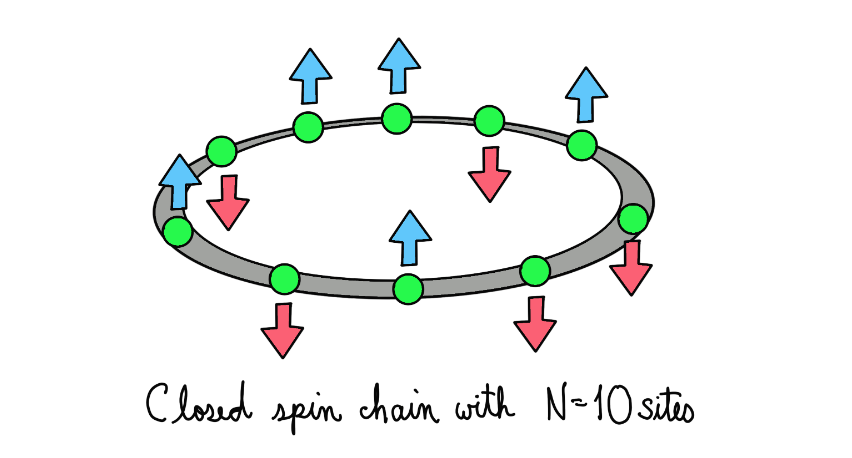

Such a quantum system is described by the *Transverse Ising Hamiltonian*. For closed spin chain with a transverse magnetic field of intensity $h$, the Transverse Ising Hamiltonian reads

$$
H = -\sum_{i=1}^{N}Z_{i}\otimes Z_{i+1} - h\sum_{i}^{N}X_{i}.
$$

The subindices $i$ indicate the spin site  where the operators act. In a closed spin chain, we identify site $N+1$ with the first site. 

A possible plan for Zenda and Reece is to use a strong magnetic field that changes the ground energy of Sqynet, causing it to malfunction. 

Your task is to help Zenda and Reece calculate the effect of external magnetic forces on the ground energy. Using the Variational Quantum Eigensolver (VQE) algorithm, you will compute the ground energy of a closed spin chain of length $N=4$. 

<details><summary><b>Epilogue</b></summary>

Zenda and Reece fire their powerful magnetic field, missiles, and bombs into the tangle of spins that is Sqynet. As its wavefunction starts to collapse, reality around them shimmers and shifts, and they are enveloped in the purple smoke characteristic of the Oracle World Transform.

The smoke clears. The Bloch clock is ticking; they are late for their weekly brainstorming session at Trine's Designs. Trine is fussing excitedly with the new coffee machine. The network is patchy. Zenda and Reece smile at each other. There are far worse things, they realize, than business as usual.

</details>

## Challenge code

In this challenge you will be given the following functions: 
- `create_Hamiltonian`: In which you build the Transverse Ising Hamiltonian for $N=4$ and a magnetic field intensity `h`. **You must complete this function.**
- `model`: This QNode builds a general enough ansatz for the ground state. This circuit must depend on some parameters `params`, which you will later optimize. It returns the expectation value of the Hamiltonian for the output state of the circuit. **You must complete this function.**
- `train`: This function returns the parameters that minimize the output of `model`. **You must complete this function.**

### Input

As input to this problem, you are given:

- `h` (`float`): Magnetic field intensity applied to the spin chain.
 
### Output

This code will output a `float` corresponding to the energy of the ground state.

If your solution matches the correct one within the given tolerance specified in `check` (in this case it's an relative tolerance of `0.1`), the output will be `"Correct!"` Otherwise, you will receive a `"Wrong answer"` prompt.

Good luck!

## Solution

In [5]:
import json
import pennylane as qml
import pennylane.numpy as np

def create_Hamiltonian(h):
    """
    Function in charge of generating the Hamiltonian of the statement.

    Args:
        h (float): magnetic field strength

    Returns:
        (qml.Hamiltonian): Hamiltonian of the statement associated to h
    """


    # Put your code here #
    coeffs = [-1,-1,-1,-1,-h,-h,-h,-h]
    obs = []
    for i in range(4):    
        obs.append(qml.PauliZ(i) @ qml.PauliZ((i+1)%4))
    for i in range(4):    
        obs.append(qml.PauliX(i))
    H = qml.Hamiltonian(coeffs, obs)
    return H
    


dev = qml.device("default.qubit", wires=4)

@qml.qnode(dev)
def model(params, H):
    """
    To implement VQE you need an ansatz for the candidate ground state!
    Define here the VQE ansatz in terms of some parameters (params) that
    create the candidate ground state. These parameters will
    be optimized later.

    Args:
        params (numpy.array): parameters to be used in the variational circuit
        H (qml.Hamiltonian): Hamiltonian used to calculate the expected value

    Returns:
        (float): Expected value with respect to the Hamiltonian H
    """
    for i in range(4):
        qml.RX(params[i], wires = i)
        qml.RY(params[i+4], wires = i)
    # Put your code here #
    return qml.expval(H)


def train(h):
    """
    In this function you must design a subroutine that returns the
    parameters that best approximate the ground state.

    Args:
        h (float): magnetic field strength

    Returns:
        (numpy.array): parameters that best approximate the ground state.
    """
    
    H = create_Hamiltonian(h)
    opt = qml.GradientDescentOptimizer(stepsize=0.4)
    theta = np.array(range(8), requires_grad=True)
    max_iterations = 100

    # store the values of the cost function
    def cost(theta):
        return model(theta, H)

    for n in range(max_iterations):
        theta, prev_energy = opt.step_and_cost(cost, theta)
        energy = cost(theta)

        
    return theta
    # Put your code here #


# These functions are responsible for testing the solution.
def run(test_case_input: str) -> str:
    ins = json.loads(test_case_input)
    params = train(ins)
    return str(model(params, create_Hamiltonian(ins)))


def check(solution_output: str, expected_output: str) -> None:
    solution_output = json.loads(solution_output)
    expected_output = json.loads(expected_output)
    assert np.allclose(
        solution_output, expected_output, rtol=1e-1
    ), "The expected value is not correct."


test_cases = [['1.0', '-5.226251859505506'], ['2.3', '-9.66382463698038']]

for i, (input_, expected_output) in enumerate(test_cases):
    print(f"Running test case {i} with input '{input_}'...")

    try:
        output = run(input_)

    except Exception as exc:
        print(f"Runtime Error. {exc}")

    else:
        if message := check(output, expected_output):
            print(f"Wrong Answer. Have: '{output}'. Want: '{expected_output}'.")

        else:
            print("Correct!")

Running test case 0 with input '1.0'...
Correct!
Running test case 1 with input '2.3'...
Correct!
